In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib
import seaborn as sns

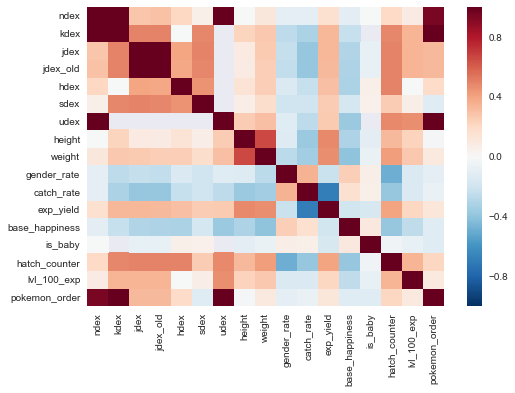

In [67]:
df = pd.read_csv('pokemon.csv')
df = df[[i for i in df.columns if i.split('_')[-1] != 'id']]
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

Быстро построили красивую картинку, но пользоваться ей неудобно. Обратимся к Plotly.

In [65]:
import plotly.offline as py
from plotly.graph_objs import *
import plotly.figure_factory as ff
import pandas as pd
py.init_notebook_mode(connected=True)
import scipy.stats as st

df = pd.read_csv('pokemon.csv')

def intercorrelate(df):
    z = []
    for name1, row1 in df.iteritems():
        zn = []
        for name2, row2 in df.iteritems():
            try:               
                zn.append(st.spearmanr(row1, row2)[0] if st.spearmanr(row1, row2)[1] < 0.05 else '')
            except:
                zn.append('')
        z.append(zn)
    return z
        

#df = df[[i for i in df.columns if i.split('_')[-1] != 'id' or i == 'generation_id']]
#corr = df.corr()
#trace = Heatmap(z=list(vals for name, vals in corr.iteritems()), 
trace = Heatmap(z=intercorrelate(df), 
        x=df.columns.values,
        y=df.columns.values,
        )
layout = Layout(
    margin=Margin(
        l=150,
        r=100,
        b=100,
        t=50,
        pad=4
    ),
)

fig = Figure(data=[trace], layout=layout)
py.iplot(fig, filename='line-mode')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/stats.py:253: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



Теперь приведены только значимые порядковые порреляции Спирмана, и она интерактивна. Т.к. о шкалах мы знаем только их служебное название, для интерпретации будем гадать на корреляционно-матричной гуще.

Catch_rate сильно отрицательно коррелирует с exp_yield. Помсотрев на сырые данные, и подключив все знания о покемонах, могу предположить, что это значит, что редких покемонов сложнее поймать, зато за них дают много опыта.
Также, много опыта дают за поимку больших и тяжелых покемонов.
А еще ,чем покемона тяжелей поймать, тем дольше его нужно высиживать в яйце.

Удивительно, но классический пример корреляции роста и веса работает и на покемонах.

Вероятно, есть разница между типами покемонов по их уровню счастья. И она даже направленная: чем бальше айди типа, тем меньше счастье.
Большие и тяжелые покемоны обычно менее счасливы, чем маленькие и легкие. И действительно, трудно представить чсасливого Черезарда или Недокинга.

*Да, отдельное слово хочу сказать, о библиотеке, которой я это нарисовал. Как видите, она может многое. Но за час гугления я так и не разобрался, как следать нулевую корреляцию серенькой а не голубенькой. Так что, пожалуйста, научите меня визуализации на JS, а то сил моих больше нет!*

P.S. Я не уверен, что математически корректно считать ранговые корреляции, когда переменная имеет много повторяющихся значений, но я рассуждаю по принципу "непараметрическая статистика стерпит все".